In [72]:
import math
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Generate RT distributions from activation and noise

First, let's code ACT-R's function that relates a memory's activation and its response time:

$ RT = T_{ER} + F \times \mathrm{e}^{-f A} $

In [73]:
def responsetime(activation, ter=1, F=1, f=1):
    return ter + F * np.exp(-f * activation)

## Encoding the role of noise

In ACT-R, RTs are a deterministic function of activation, but activation is, in itself, a probabilistic function. The probability of a chunk being selected is determined by the noise parameter $s$, which is distributed according to a logistic distribution.

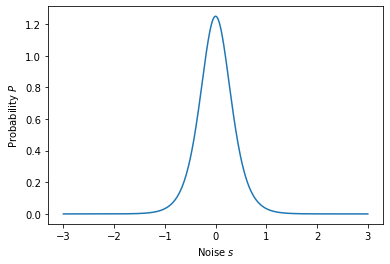

In [74]:
noise = np.linspace(-3, 3, 1000)
dist = sp.stats.logistic(0, 0.2)
plt.plot(noise, dist.pdf(noise))
plt.xlabel("Noise $s$")
plt.ylabel("Probability $P$")
plt.show()

## The relationship between noise and RTs

The above graph means that the a chunk can take an activation value of $A + s$ with probability $P(s)$ (the y-axies of the graph above).

For each value of $A + s$, we can then calculate the corresponding RTs.

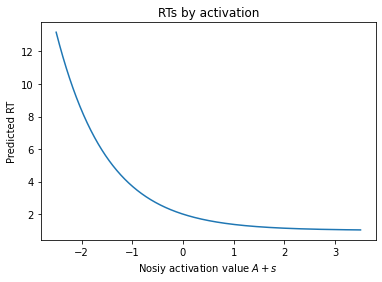

In [75]:
a_plus_s = 0.5 + noise
rts = responsetime(a_plus_s)
plt.plot(a_plus_s, rts)
plt.xlabel("Nosiy activation value $A + s$")
plt.ylabel("Predicted RT")
plt.title("RTs by activation")
plt.show()

## From RTs to probabilities

Thus, the probability density function of response times can be obtained by plotting the probability density function of noise $s$ over the predicted RTs for $A + s$. Note that $T_{ER}$ is the horizontal offset at which the line begins.

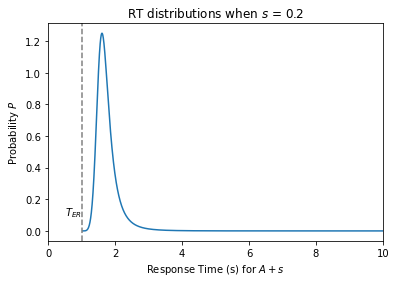

In [76]:
rts = [responsetime(0.5 - x) for x in noise]
plt.plot(rts, dist.pdf(noise))
plt.xlabel("Response Time (s) for $A + s$")
plt.ylabel("Probability $P$")
plt.xlim(0, 10)
plt.axvline(x=1, color="grey", linestyle="dashed")
plt.text(1, 0.1, "$T_{ER}$", horizontalalignment="right")
plt.title("RT distributions when $s$ = 0.2")
plt.show()

The following graph illustrates how response time distributions change as a function of noise. 

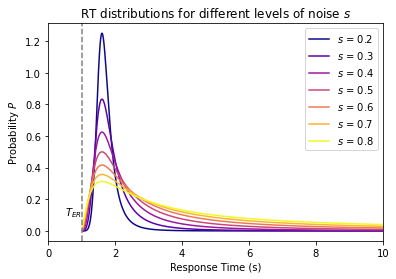

In [77]:
cols = plt.cm.plasma(np.linspace(0, 1, 7))
for i, s in enumerate(np.linspace(0.2, 0.8, 7)):
    dist = sp.stats.logistic(0, s)
    rts = [responsetime(0.5 - x) for x in noise]
    plt.plot(rts, dist.pdf(noise), color=cols[i])
plt.legend(["$s$ = %.1f" % (x,) for x in np.linspace(0.2, 0.8, 7)])
plt.xlabel("Response Time (s)")
plt.ylabel("Probability $P$")
plt.xlim(0,10)
plt.axvline(x=1, color="grey", linestyle="dashed")
plt.text(1, 0.1, "$T_{ER}$", horizontalalignment="right")
plt.title("RT distributions for different levels of noise $s$")
plt.show()

## Log Likelihood

The log-likelihood of an RT can be calculated by identifying the corresponding probability on a curve. 

In [78]:
norm = np.sum(dist.pdf(noise))
rt = 2.568
approx_rt, approx_noise = [(rts[i], noise[i])  for i in range(len(rts)) if rts[i] > rt][0]
approx_prob = dist.pdf(approx_noise)
print(approx_prob)

0.22356866891550745


Text(0.5, 1.0, 'From RTs to Probabilitis and log likelihoods')

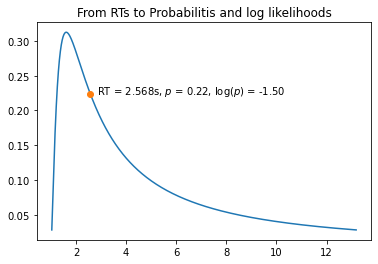

In [79]:
plt.plot(rts, dist.pdf(noise))
plt.plot(approx_rt, approx_prob, "o")
plt.text(approx_rt*1.1, approx_prob, "RT = %.3fs, $p$ = %.2f, $\log(p)$ = %.2f" % (rt, approx_prob, np.log(approx_prob)))
plt.title("From RTs to Probabilitis and log likelihoods")